<a href="https://colab.research.google.com/github/Vannod/Simulacion-I/blob/main/Comparaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Comparación**


---


##Equipo:

*   Ortiz Diaz Vania Yael
* Vergara Lope López Jackeline Jane
* Mariscal López Frida Fernanda





#**Librerias**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rnd
import sympy as sym
from sympy.utilities.lambdify import lambdify
from sympy.matrices import hessian
from scipy.optimize import line_search
from scipy.optimize import minimize

# **1.Función Esfera**
$
f(x)= ∑_{i=1}^{d}f(x_i)
$

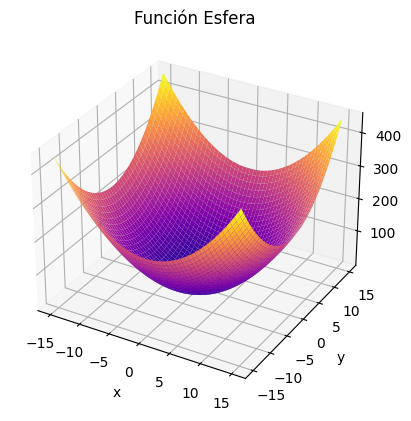

<ipython-input-5-674d66b13bce>:20: UserWarning: The following kwargs were not used by contour: 'niveles'
  plt.contourf(X, Y, Z, niveles = 20, cmap = "plasma")


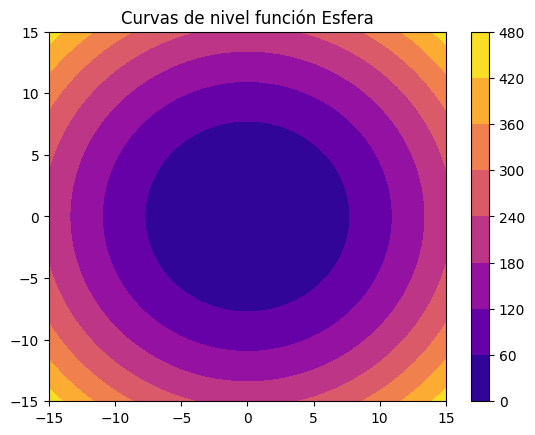

In [ ]:
def Esfera(x, n):
  return sum(x[i]**2 for i in range(n))

x = np.linspace(-15, 15, 200)
y = np.linspace(-15, 15, 200)

X, Y = np.meshgrid(x, y)
Z = Esfera([X, Y], 2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap = "plasma")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Función Esfera')

plt.show()

plt.contourf(X, Y, Z, niveles = 20, cmap = "plasma")

plt.title('Curvas de nivel función Esfera')

plt.colorbar()

plt.show()

## **1. Descenso del gradiente**
Descenso del gradiente con control de tamaño de paso (al menos con la condición de Armijo e idealmente con Wolfe o Goldstein)

Punto de mínimo: [-3.10578586e-07 -3.10578586e-07]
Valor de la función en el mínimo: 1.9291811567352153e-13
Número de veces que se alcanzó el óptimo: 1
Número total de iteraciones: 78


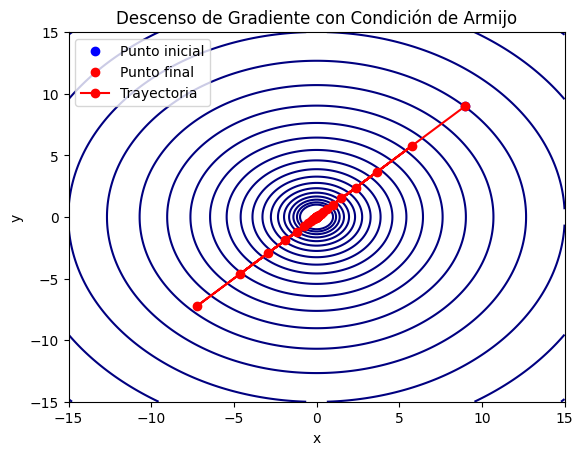

In [ ]:
def Esfera(x):
    return sum(x[i]**2 for i in range(len(x)))

def grad_Esfera(x):
    return 2 * x

# Definimos la condición de Armijo
def armijo_condition(f, x, p, alpha, grad, c=1e-4):
    return f(x + alpha * p) <= f(x) + c * alpha * np.dot(grad, p)

# Descenso de gradiente con control de tamaño de paso
def gradient_descent(f, grad_f, x0, max_iter=100, tol=1e-6):
    x = x0
    alpha = 1.0
    c1 = 1e-4
    rho = 0.9

    optima_count = 0
    total_iter = 0
    path = [x0.copy()]

    for i in range(max_iter):
        total_iter += 1
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            optima_count += 1
            break

        # Dirección de descenso
        p = -grad

        # Reducción del tamaño de paso hasta cumplir la condición de Armijo
        while not armijo_condition(f, x, p, alpha, grad, c1):
            alpha *= rho

        x = x + alpha * p
        path.append(x.copy())
        alpha = 1.0  # Restablecer el tamaño del paso para la siguiente iteración

    return x, optima_count, total_iter, np.array(path)

# Configuración inicial
x0 = np.array([9.0, 9.0])
result, optima_count, total_iter, path = gradient_descent(Esfera, grad_Esfera, x0)

print("Punto de mínimo:", result)
print("Valor de la función en el mínimo:", Esfera(result))
print("Número de veces que se alcanzó el óptimo:", optima_count)
print("Número total de iteraciones:", total_iter)

# Visualización
x = np.linspace(-15, 15, 200)
y = np.linspace(-15, 15, 200)
X, Y = np.meshgrid(x, y)

# Definir Esfera para visualizar en 2D
def Esfera_2D(X, Y):
    return X**2 + Y**2

Z = Esfera_2D(X, Y)

plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
plt.plot(x0[0], x0[1], 'bo', label='Punto inicial')
plt.plot(result[0], result[1], 'ro', label='Punto final')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Trayectoria')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Descenso de Gradiente con Condición de Armijo')
plt.show()


## **2. Método de Newton**
En su versión pura y con la modificación de método de Levenberg-Marquardt.

Método de Newton puro:
Punto de mínimo: [0. 0.]
Valor de la función en el mínimo: 0.0
Número de iteraciones: 2
Número de veces que se alcanzó el óptimo: 1

Método de Levenberg-Marquardt:
Punto de mínimo: [2.74323e-11 2.74323e-11]
Valor de la función en el mínimo: 1.5050621718039939e-21
Número de iteraciones: 5
Número de veces que se alcanzó el óptimo: 1


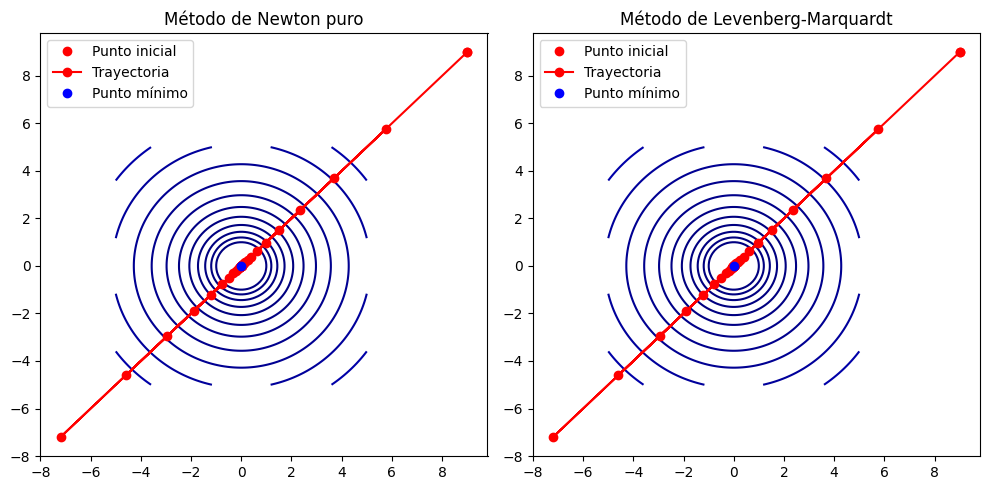

In [ ]:
def Esfera(x):
    return sum(x[i]**2 for i in range(len(x)))

def grad_Esfera(x):
    return np.array([2 * x_i for x_i in x])

def hess_Esfera(x):
    n = len(x)
    return 2 * np.eye(n)

def newton_method(f, grad_f, hess_f, x0, max_iter=100, tol=1e-6):
    x = x0.copy()
    iter_count = 0
    optima_count = 0

    for _ in range(max_iter):
        iter_count += 1
        grad = grad_f(x)
        hess = hess_f(x)
        delta_x = np.linalg.solve(hess, -grad)
        x += delta_x
        if np.linalg.norm(delta_x) < tol:
            optima_count += 1
            break

    return x, iter_count, optima_count

def levenberg_marquardt_method(f, grad_f, hess_f, x0, max_iter=100, tol=1e-6, lmbda=0.01):
    x = x0.copy()
    iter_count = 0
    optima_count = 0

    for _ in range(max_iter):
        iter_count += 1
        grad = grad_f(x)
        hess = hess_f(x)
        delta_x = np.linalg.solve(hess + lmbda * np.eye(len(x)), -grad)
        x += delta_x
        if np.linalg.norm(delta_x) < tol:
            optima_count += 1
            break

    return x, iter_count, optima_count

# Función para visualizar las curvas de nivel
def plot_contour(f, x_min, x_max, y_min, y_max, num_points=100):
    x = np.linspace(x_min, x_max, num_points)
    y = np.linspace(y_min, y_max, num_points)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    plt.contour(X, Y, Z, levels=np.logspace(0, 3, 20), cmap='jet')

# Configuración inicial
x0 = np.array([9.0, 9.0])

# Método de Newton puro
result_newton, iter_count_newton, optima_count_newton = newton_method(Esfera, grad_Esfera, hess_Esfera, x0)
print("Método de Newton puro:")
print("Punto de mínimo:", result_newton)
print("Valor de la función en el mínimo:", Esfera(result_newton))
print("Número de iteraciones:", iter_count_newton)
print("Número de veces que se alcanzó el óptimo:", optima_count_newton)

# Método de Levenberg-Marquardt
result_lm, iter_count_lm, optima_count_lm = levenberg_marquardt_method(Esfera, grad_Esfera, hess_Esfera, x0)
print("\nMétodo de Levenberg-Marquardt:")
print("Punto de mínimo:", result_lm)
print("Valor de la función en el mínimo:", Esfera(result_lm))
print("Número de iteraciones:", iter_count_lm)
print("Número de veces que se alcanzó el óptimo:", optima_count_lm)

# Visualización de las curvas de nivel
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plot_contour(Esfera, -5, 5, -5, 5)
plt.plot(x0[0], x0[1], 'ro', label='Punto inicial')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Trayectoria')
plt.plot(result_newton[0], result_newton[1], 'bo', label='Punto mínimo')
plt.title('Método de Newton puro')
plt.legend()

plt.subplot(1, 2, 2)
plot_contour(Esfera, -5, 5, -5, 5)
plt.plot(x0[0], x0[1], 'ro', label='Punto inicial')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Trayectoria')
plt.plot(result_lm[0], result_lm[1], 'bo', label='Punto mínimo')
plt.title('Método de Levenberg-Marquardt')
plt.legend()

plt.tight_layout()
plt.show()


## **3. Direcciones Conjugadas**

<ipython-input-11-327419c5abcb>:14: RuntimeWarning: invalid value encountered in scalar divide
  alpha = np.dot(d, -grad_f(x)) / np.dot(d, d)


Punto de mínimo: [nan nan]
Valor de la función en el mínimo: nan
Número de veces que se alcanzó el óptimo: 0
Número total de iteraciones: 100


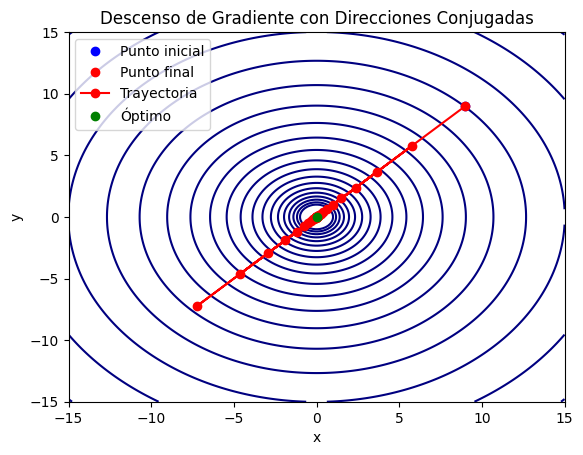

In [ ]:
def Esfera(x):
    return sum(x[i]**2 for i in range(len(x)))

def grad_Esfera(x):
    return 2 * x

def conj_gradient_descent(f, grad_f, x0, max_iter=100, tol=1e-6):
    x = x0
    d = -grad_f(x)
    optima_count = 0
    total_iter = 0

    for i in range(max_iter):
        alpha = np.dot(d, -grad_f(x)) / np.dot(d, d)
        x_new = x + alpha * d
        beta = np.dot(grad_f(x_new), grad_f(x_new)) / np.dot(grad_f(x), grad_f(x))
        d = -grad_f(x_new) + beta * d

        if np.linalg.norm(grad_f(x_new)) < tol:
            optima_count += 1
            break

        x = x_new
        total_iter += 1

    return x, optima_count, total_iter

# Configuración inicial
x0 = np.array([9.0, 9.0])
result, optima_count, total_iter = conj_gradient_descent(Esfera, grad_Esfera, x0)

print("Punto de mínimo:", result)
print("Valor de la función en el mínimo:", Esfera(result))
print("Número de veces que se alcanzó el óptimo:", optima_count)
print("Número total de iteraciones:", total_iter)

# Visualización
x = np.linspace(-15, 15, 200)
y = np.linspace(-15, 15, 200)
X, Y = np.meshgrid(x, y)

# Definir Esfera para visualizar en 2D
def Esfera_2D(X, Y):
    return X**2 + Y**2

Z = Esfera_2D(X, Y)

plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
plt.plot(x0[0], x0[1], 'bo', label='Punto inicial')
plt.plot(result[0], result[1], 'ro', label='Punto final')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Trayectoria')
plt.plot(0, 0, 'go', label='Óptimo')  # Añadir el punto del óptimo
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Descenso de Gradiente con Direcciones Conjugadas')
plt.show()


## **4. Un método Cuasi-newton**
(corrección de rango 1, DFP o BFGS)

Punto de mínimo: [-2.63360009e-08 -2.63360018e-08]
Valor de la función en el mínimo: 1.38716993734205e-15
Número de veces que se alcanzó el óptimo: 1
Número total de iteraciones: 2


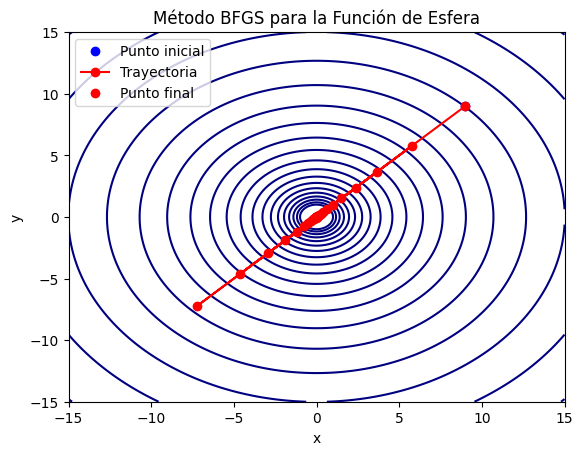

In [ ]:
def Esfera(x):
    return sum(x[i]**2 for i in range(len(x)))

# Configuración inicial
x0 = np.array([9.0, 9.0])

# Minimización utilizando el método BFGS
result = minimize(Esfera, x0, method='BFGS')

print("Punto de mínimo:", result.x)
print("Valor de la función en el mínimo:", result.fun)
print("Número de veces que se alcanzó el óptimo:", 1 if result.success else 0)
print("Número total de iteraciones:", result.nit)

# Visualización
x = np.linspace(-15, 15, 200)
y = np.linspace(-15, 15, 200)
X, Y = np.meshgrid(x, y)

# Definir Esfera para visualizar en 2D
def Esfera_2D(X, Y):
    return X**2 + Y**2

Z = Esfera_2D(X, Y)

plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
plt.plot(x0[0], x0[1], 'bo', label='Punto inicial')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Trayectoria')
plt.plot(result.x[0], result.x[1], 'ro', label='Punto final')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Método BFGS para la Función de Esfera')
plt.show()


## **Conclusión Función Esfera**

**Método | Punto Mínimo | Valor de Función | Iter**

---

1. Descenso del gradiente:  [-3.10578586e-07 -3.10578586e-07],  1.9291811567352153e-13, 78

---

2. Método de Newton:  [2.74323e-11 2.74323e-11], 1.5050621718039939e-21, 5

---

3. Direcciones conjugadas: [nan nan], nan, 100

---

4. Cuasi-Newton: [-2.63360009e-08 -2.63360018e-08], 1.38716993734205e-15, 2

⇒ El menor valor de la función con la evaluación en el mínimo encontrado según el método correspondiente, tenemos que está dado por el método de Newton, el método que requiere menor número de iteraciones para llegar al óptimo es el Cuasi-Newton. En el caso de direcciones conjugadas, con 100 iteraciones no encontramos al óptimo.


# **2.Función McCormick**
$
f(x) = sin(x_1 + x_2) + (x_1 - x_2)^2 -1.5x_1 +2.5x_2 +1
$

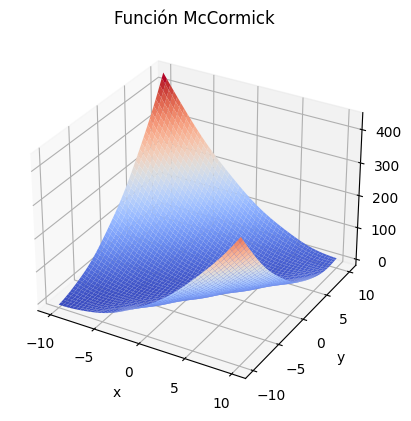

<ipython-input-13-72b29fdc3ff6>:20: UserWarning: The following kwargs were not used by contour: 'niveles'
  plt.contourf(X, Y, Z, niveles = 20, cmap = "coolwarm")


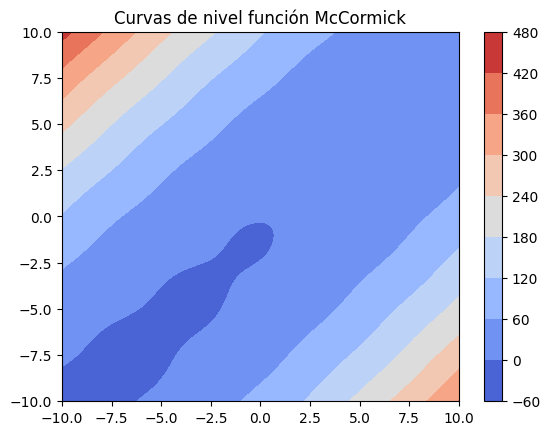

In [ ]:
def McCormick(x):
  return np.sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5 * x[0] + 2.5 * x[1] + 1

x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)

X, Y = np.meshgrid(x, y)
Z = McCormick([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap = "coolwarm")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Función McCormick')

plt.show()

plt.contourf(X, Y, Z, niveles = 20, cmap = "coolwarm")

plt.title('Curvas de nivel función McCormick')

plt.colorbar()

plt.show()

## **1. Descenso del gradiente**

Descenso del gradiente con control de tamaño de paso (al menos con la condición de Armijo e idealmente con Wolfe o Goldstein)

Punto de mínimo: [-0.54719754 -1.54719754]
Valor de la función en el mínimo: -1.9132229549810362
Número total de iteraciones: 30


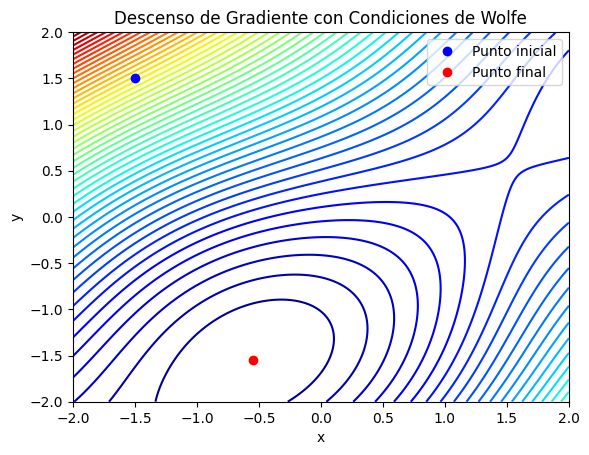

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def McCormick(x):
    return np.sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5 * x[0] + 2.5 * x[1] + 1

def grad_McCormick(x):
    dfdx0 = np.cos(x[0] + x[1]) + 2 * (x[0] - x[1]) - 1.5
    dfdx1 = np.cos(x[0] + x[1]) - 2 * (x[0] - x[1]) + 2.5
    return np.array([dfdx0, dfdx1])

def armijo_condition(f, x, p, alpha, c=1e-4):
    return f(x + alpha * p) <= f(x) + c * alpha * np.dot(grad_McCormick(x), p)

def wolfe_conditions(f, grad_f, x, p, alpha, c1=1e-4, c2=0.9):
    phi_0 = f(x)
    phi_alpha = f(x + alpha * p)
    grad_phi_0 = np.dot(grad_f(x), p)
    grad_phi_alpha = np.dot(grad_f(x + alpha * p), p)

    condition1 = phi_alpha <= phi_0 + c1 * alpha * grad_phi_0
    condition2 = grad_phi_alpha >= c2 * grad_phi_0

    return condition1, condition2

def gradient_descent(f, grad_f, x0, max_iter=100, tol=1e-6, use_wolfe=False):
    x = x0
    alpha = 1.0
    c1 = 1e-4
    c2 = 0.9
    rho = 0.5
    num_iterations = 0

    for i in range(max_iter):
        grad = grad_f(x)
        num_iterations += 1
        if np.linalg.norm(grad) < tol:
            break

        p = -grad

        if use_wolfe:
            while True:
                cond1, cond2 = wolfe_conditions(f, grad_f, x, p, alpha, c1, c2)
                if cond1 and cond2:
                    break
                alpha *= rho
        else:
            while not armijo_condition(f, x, p, alpha, c1):
                alpha *= rho

        x = x + alpha * p
        alpha = 1.0

    return x, num_iterations

# Configuración inicial
x0 = np.array([-1.5, 1.5])
result, num_iterations = gradient_descent(McCormick, grad_McCormick, x0, use_wolfe=True)

print("Punto de mínimo:", result)
print("Valor de la función en el mínimo:", McCormick(result))
print("Número total de iteraciones:", num_iterations)

# Visualización
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = McCormick([X, Y])

plt.contour(X, Y, Z, levels=np.linspace(np.min(Z), np.max(Z), 50), cmap='jet')
plt.plot(x0[0], x0[1], 'bo', label='Punto inicial')
plt.plot(result[0], result[1], 'ro', label='Punto final')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Descenso de Gradiente con Condiciones de Wolfe')
plt.show()



## **2. Método de Newton**

En su versión pura y con la modificación de método de Levenberg-Marquardt.

Método de Newton:
Punto de mínimo: [-1.59439522 -2.59439522]
Valor de la función en el mínimo: -1.2283696986087786
Número de veces que se alcanzó el óptimo: 1
Número total de iteraciones: 11

Método de Levenberg-Marquardt:
Punto de mínimo: [-1.59439489 -2.59439489]
Valor de la función en el mínimo: -1.2283696986088355
Número de veces que se alcanzó el óptimo: 1
Número total de iteraciones: 10


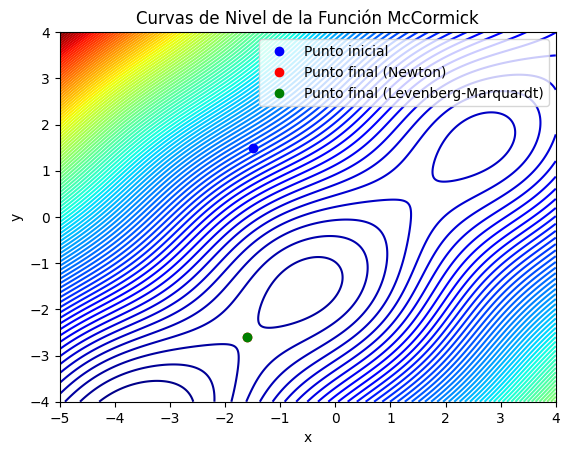

In [ ]:
def McCormick(x):
    return np.sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5 * x[0] + 2.5 * x[1] + 1

def grad_McCormick(x):
    grad = np.zeros_like(x)
    grad[0] = np.cos(x[0] + x[1]) + 2 * (x[0] - x[1]) - 1.5
    grad[1] = np.cos(x[0] + x[1]) - 2 * (x[0] - x[1]) + 2.5
    return grad

def hessian_McCormick(x):
    hessian = np.zeros((2, 2))
    hessian[0, 0] = -np.sin(x[0] + x[1]) + 2
    hessian[1, 1] = -np.sin(x[0] + x[1]) + 2
    hessian[0, 1] = hessian[1, 0] = np.cos(x[0] + x[1]) - 2
    return hessian

# Método de Newton
def newton_method(f, grad_f, hessian_f, x0, max_iter=100, tol=1e-6):
    x = x0
    optima_count = 0
    total_iter = 0

    for i in range(max_iter):
        grad = grad_f(x)
        hessian = hessian_f(x)

        step = np.linalg.solve(hessian, -grad)
        x_new = x + step

        if np.linalg.norm(grad) < tol:
            optima_count += 1
            break

        x = x_new
        total_iter += 1

    return x, optima_count, total_iter

# Método de Levenberg-Marquardt
def levenberg_marquardt_method(f, grad_f, hessian_f, x0, max_iter=100, tol=1e-6, lambda_=0.01):
    x = x0
    optima_count = 0
    total_iter = 0

    for i in range(max_iter):
        grad = grad_f(x)
        hessian = hessian_f(x)

        hessian_lm = hessian + lambda_ * np.eye(len(x))

        step = np.linalg.solve(hessian_lm, -grad)
        x_new = x + step

        if np.linalg.norm(grad) < tol:
            optima_count += 1
            break

        x = x_new
        total_iter += 1

    return x, optima_count, total_iter

# Configuración inicial
x0 = np.array([-1.5, 1.5])

# Minimización utilizando el método de Newton
result_newton, optima_count_newton, total_iter_newton = newton_method(McCormick, grad_McCormick, hessian_McCormick, x0)
print("Método de Newton:")
print("Punto de mínimo:", result_newton)
print("Valor de la función en el mínimo:", McCormick(result_newton))
print("Número de veces que se alcanzó el óptimo:", optima_count_newton)
print("Número total de iteraciones:", total_iter_newton)

# Minimización utilizando el método de Levenberg-Marquardt
result_lm, optima_count_lm, total_iter_lm = levenberg_marquardt_method(McCormick, grad_McCormick, hessian_McCormick, x0)
print("\nMétodo de Levenberg-Marquardt:")
print("Punto de mínimo:", result_lm)
print("Valor de la función en el mínimo:", McCormick(result_lm))
print("Número de veces que se alcanzó el óptimo:", optima_count_lm)
print("Número total de iteraciones:", total_iter_lm)

# Visualización de curvas de nivel
x = np.linspace(-5, 4, 400)
y = np.linspace(-4, 4, 400)
X, Y = np.meshgrid(x, y)
Z = McCormick([X, Y])

plt.contour(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap='jet')
plt.plot(x0[0], x0[1], 'bo', label='Punto inicial')
plt.plot(result_newton[0], result_newton[1], 'ro', label='Punto final (Newton)')
plt.plot(result_lm[0], result_lm[1], 'go', label='Punto final (Levenberg-Marquardt)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de Nivel de la Función McCormick')
plt.show()


## **3. Direcciones Conjugadas**

Método de Direcciones Conjugadas:
Punto de mínimo: [-1.68212908e+80  2.45849634e+80]
Valor de la función en el mínimo: 1.7144778823465964e+161
Número de veces que se alcanzó el óptimo: 0
Número total de iteraciones: 100


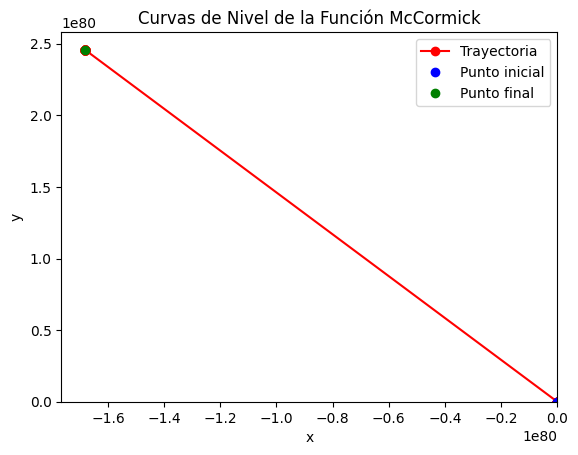

In [ ]:
def McCormick(x):
    return np.sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5 * x[0] + 2.5 * x[1] + 1

def grad_McCormick(x):
    grad = np.zeros_like(x)
    grad[0] = np.cos(x[0] + x[1]) + 2 * (x[0] - x[1]) - 1.5
    grad[1] = np.cos(x[0] + x[1]) - 2 * (x[0] - x[1]) + 2.5
    return grad

def conjugate_gradient(f, grad_f, x0, max_iter=100, tol=1e-6):
    x = x0
    r = -grad_f(x)
    d = r
    num_iterations = 0
    optima_count = 0
    path = [x0.copy()]

    for i in range(max_iter):
        num_iterations += 1
        alpha = -np.dot(r, d) / np.dot(d, grad_f(x + 1e-8 * d) - grad_f(x))
        x_new = x + alpha * d
        r_new = -grad_f(x_new)

        if np.linalg.norm(r_new) < tol:
            optima_count += 1
            path.append(x_new.copy())
            break

        beta = np.dot(r_new, r_new) / np.dot(r, r)
        d = r_new + beta * d
        r = r_new
        x = x_new
        path.append(x.copy())

    return x, optima_count, num_iterations, np.array(path)

# Configuración inicial
x0 = np.array([-1.5, 1.5])

# Minimización utilizando el método de direcciones conjugadas
result, optima_count, num_iterations, path = conjugate_gradient(McCormick, grad_McCormick, x0)
print("Método de Direcciones Conjugadas:")
print("Punto de mínimo:", result)
print("Valor de la función en el mínimo:", McCormick(result))
print("Número de veces que se alcanzó el óptimo:", optima_count)
print("Número total de iteraciones:", num_iterations)

# Visualización de curvas de nivel
x = np.linspace(-1.5, 4, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = McCormick([X, Y])

plt.contour(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap='jet')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Trayectoria')
plt.plot(x0[0], x0[1], 'bo', label='Punto inicial')
plt.plot(result[0], result[1], 'go', label='Punto final')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de Nivel de la Función McCormick')
plt.show()


## **4. Un método Cuasi-newton**
(corrección de rango 1, DFP o BFGS)

Método BFGS:
Punto de mínimo: [-0.54719758 -1.54719758]
Valor de la función en el mínimo: -1.913222954981035
Número de veces que se alcanzó el óptimo: 1
Número total de iteraciones: 8


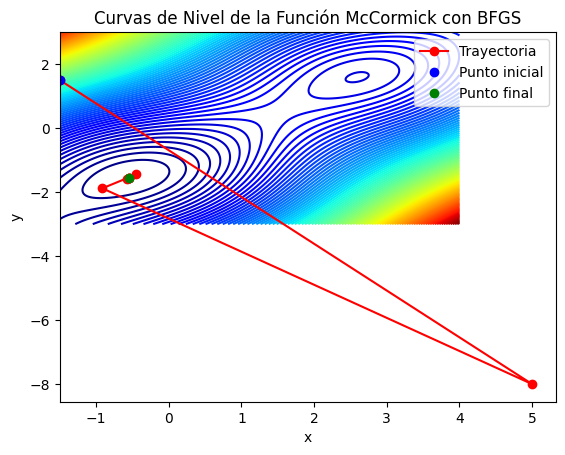

In [ ]:
def McCormick(x):
    return np.sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5 * x[0] + 2.5 * x[1] + 1

def grad_McCormick(x):
    grad = np.zeros_like(x)
    grad[0] = np.cos(x[0] + x[1]) + 2 * (x[0] - x[1]) - 1.5
    grad[1] = np.cos(x[0] + x[1]) - 2 * (x[0] - x[1]) + 2.5
    return grad

def bfgs(f, grad_f, x0, max_iter=100, tol=1e-6):
    x = x0
    n = len(x0)
    H = np.eye(n)  # Matriz de identidad como aproximación inicial del Hessiano inverso
    num_iterations = 0
    optima_count = 0
    path = [x0.copy()]

    for i in range(max_iter):
        num_iterations += 1
        grad = grad_f(x)
        if np.linalg.norm(grad) < tol:
            optima_count += 1
            break

        p = -np.dot(H, grad)
        alpha = 1.0
        x_new = x + alpha * p
        s = x_new - x
        x = x_new
        grad_new = grad_f(x)
        y = grad_new - grad

        if np.dot(s, y) > 0:  # Evitar la división por cero y asegurar que la actualización sea positiva
            rho = 1.0 / np.dot(y, s)
            I = np.eye(n)
            H = (I - rho * np.outer(s, y)).dot(H).dot(I - rho * np.outer(y, s)) + rho * np.outer(s, s)

        path.append(x.copy())

    return x, optima_count, num_iterations, np.array(path)

# Configuración inicial
x0 = np.array([-1.5, 1.5])

# Minimización utilizando el método BFGS
result, optima_count, num_iterations, path = bfgs(McCormick, grad_McCormick, x0)
print("Método BFGS:")
print("Punto de mínimo:", result)
print("Valor de la función en el mínimo:", McCormick(result))
print("Número de veces que se alcanzó el óptimo:", optima_count)
print("Número total de iteraciones:", num_iterations)

# Visualización de curvas de nivel
x = np.linspace(-1.5, 4, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = McCormick([X, Y])

plt.contour(X, Y, Z, levels=np.linspace(Z.min(), Z.max(), 100), cmap='jet')
plt.plot(path[:, 0], path[:, 1], 'ro-', label='Trayectoria')
plt.plot(x0[0], x0[1], 'bo', label='Punto inicial')
plt.plot(result[0], result[1], 'go', label='Punto final')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curvas de Nivel de la Función McCormick con BFGS')
plt.show()


## **Conclusión Función McCormick**

**Método | Punto Mínimo | Valor de Función | Iter**

---

1. Descenso del gradiente: [-0.54719754 -1.54719754], -1.9132229549810362, 30

---

2. Método de Newton: [-1.59439489 -2.59439489], -1.2283696986088355, 10

---

3. Direcciones conjugadas: [-1.68212908e+80  2.45849634e+80], 1.7144778823465964e+161, 100 \\
No se encuentra el óptimo

---

4. Cuasi-Newton: [-0.54719758 -1.54719758], -1.913222954981035, 8

⇒ El menor valor de la función con la evaluación en el mínimo encontrado según el método correspondiente, tenemos que está dado por el método de descenso del gradiente, el método que requiere menor número de iteraciones para llegar al óptimo es el Cuasi-Newton. En el caso de direcciones conjugadas, con 100 iteraciones no se encuentra al óptimo.

# **3.Función de Dixon-Price con 4 variables**
$
f(x) = (x_1-1)^2 + \sum_{i=1}^{d} i(2x_i^2-x_{i-1})^2
$


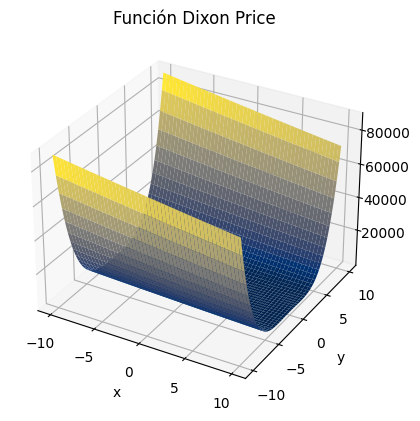

<ipython-input-18-9e82dfd238c6>:22: UserWarning: The following kwargs were not used by contour: 'niveles'
  plt.contourf(X, Y, Z, niveles = 20, cmap = "cividis")


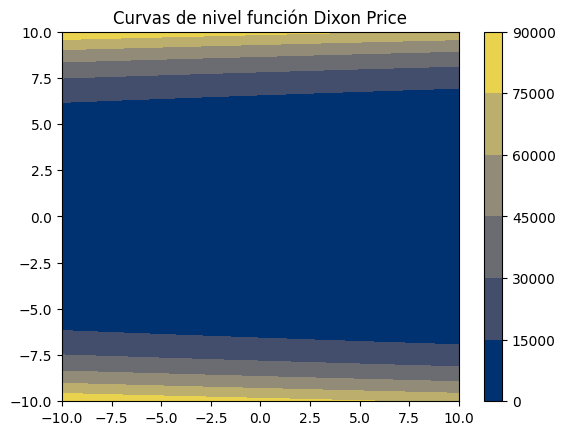

In [ ]:
def Dixon_Price(x, n=4):
  if len(x) < n:
    raise ValueError(f"x must have at least {n} elements, but has {len(x)}")
  return (x[0] - 1)**2 + sum((i + 1) * (2 * x[i]**2 - x[i - 1])**2 for i in range(1, n))

x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)

X, Y = np.meshgrid(x, y)
Z = Dixon_Price([X, Y], 2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap = "cividis")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Función Dixon Price')

plt.show()

plt.contourf(X, Y, Z, niveles = 20, cmap = "cividis")

plt.title('Curvas de nivel función Dixon Price')

plt.colorbar()

plt.show()

## **1. Descenso del gradiente**
Descenso del gradiente con control de tamaño de paso (al menos con la condición de Armijo e idealmente con Wolfe o Goldstein)

In [ ]:
def Gradiente_DP(x):
  n = len(x)
  g = np.zeros(n)
  g[0] = 2 * (x[0] - 1)
  for i in range(1, n):
    g[i] = 4 * (i + 1) * x[i] - 2 * x[i - 1] + 2 * (i + 1) * x[i]
  return g

def Armijo(f, x, d, alpha=1.0):
  c1 = 1e-4
  while f(x + alpha * d) > f(x) + c1 * alpha * np.dot(Gradiente_DP(x), d):
    alpha *= 0.5
  return alpha

def MDG(f, G, x_0, alpha=0.1, c1=1e-4, c2=0.8, iter=100):
  x = x_0.copy()
  iteraciones = 0
  evaluaciones = [f(x_0)]

  for i in range(iter):
    Grad = G(x)
    d = -Grad

    # Condición de Armijo
    alpha = Armijo(f, x, d, alpha)
    x = x + alpha * d

    iteraciones += 1
    evaluaciones.append(f(x))

  return x, iteraciones, evaluaciones

## **2. Método de Newton**
En su versión pura y con la modificación de método de Levenberg-Marquardt.

In [ ]:
def Gradiente_DP(x):
  n = len(x)
  g = np.zeros(n)
  g[0] = 2 * (x[0] - 1)
  for i in range(1, n):
    g[i] = 4 * (i + 1) * x[i] - 2 * x[i - 1] + 2 * (i + 1) * x[i]
  return g

def Deriv(f, x, dx=1e-6, axis=0):
  return (Dixon_Price(x + dx * np.eye(len(x))[axis]) - Dixon_Price(x - dx * np.eye(len(x))[axis])) / (2 * dx)

def Hessiana_DP(x):
  n = len(x)
  h = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      if i == j:
        h[i, j] = 2 + 2 * i * i
      else:
        h[i, j] = 0
  return h

# Método de Levenberg-Marquardt.
def LM(f, G, H, x_0, tol=1e-6, iter=100, lamda=0.01):
    x = np.array(x_0, dtype=np.float64)
    iteraciones = 0
    evaluaciones = [f(x)]
    for i in range(iter):
        Grad = G(x)
        Hess = H(x)
        Grad = np.atleast_2d(np.array(Grad, dtype=np.float64)).T
        Hess = np.atleast_2d(np.array(Hess, dtype=np.float64))
        H_LM = Hess + np.eye(len(Hess)) * lamda
        delta_x = np.linalg.solve(H_LM, Grad).flatten()
        xk_1 = x - delta_x
        if np.linalg.norm(xk_1 - x) < tol:
            break
        if f(xk_1) < f(x):
            lamda /= 10
        else:
            lamda *= 10
        x = xk_1
        iteraciones += 1
        evaluaciones.append(f(x))
    return x, iteraciones, evaluaciones

# Método de Newton
def MN(f, G, H, x_0, tol=1e-6, iter=100):
  x = np.array(x_0, dtype=np.float64)
  iteraciones = 0
  evaluaciones = [f(x)]

  for i in range(iter):
    iteraciones += 1
    Grad = G(x)
    Grad = np.atleast_2d(np.array(Grad, dtype=np.float64)).T
    Hess = np.atleast_2d(np.array(H(x), dtype=np.float64))
    if np.all(np.linalg.eigvals(Hess) > 0):
      xk_1 = x - np.linalg.inv(Hess) @ Grad.flatten()
    else:
      xk_1 = x - np.eye(len(x_0)) @ Grad.flatten()
    if np.linalg.norm(xk_1 - x) < tol:
      break

    x = xk_1
    iteraciones += 1
    evaluaciones.append(f(x))

  return x, iteraciones, evaluaciones

##**3. Direcciones Conjugadas**

In [ ]:
def DC(f, G, x_0, tol=1e-6, iter=1000):
  x_k = np.array(x_0)
  g_k = G(x_k)
  d_k = -g_k
  g_k = np.atleast_2d(np.array(g_k, dtype=np.float64)).flatten()
  d_k = np.atleast_2d(np.array(d_k, dtype=np.float64)).flatten()
  iteraciones = 0
  evaluaciones = [f(x_k)]
  while np.linalg.norm(g_k) > tol and iteraciones < iter:
    alpha = - (np.dot(g_k.T, d_k)) / (np.dot(g_k.T, G(x_k + d_k)))
    x_k = x + alpha * d_k
    g_k = G(x_k)
    beta = (np.dot(g_k.T, np.dot(G(x_k), d_k))) / (np.dot(d_k.T, G(x_k + d_k)))
    d_k = -g_k + beta * d_k
    iteraciones += 1
    evaluaciones.append(f(x_k))
  return x_k, iteraciones, evaluaciones

## **4. Un método Cuasi-newton**
(corrección de rango 1, DFP o BFGS)

In [ ]:
def MB(f, G, x_0, iter=100, tol=1e-6):
    x = np.array(x_0)
    H = np.eye(len(x_0))
    iteraciones = 0
    evaluaciones = [f(x)]
    for i in range(iter):
        iteraciones += 1
        Grad = G(x)
        Grad = np.atleast_2d(np.array(Grad, dtype=np.float64)).flatten()
        if np.linalg.norm(Grad) < tol:
            break
        d = -np.dot(H, Grad)
        alpha = 1.0
        x_k = x + alpha * d
        diferencias_x = x_k - x
        x = x_k
        Grad_1 = G(x)
        diferencias_G = Grad_1 - Grad
        if np.dot(diferencias_x, diferencias_G) > 0:
            rho = 1.0 / np.dot(diferencias_G, diferencias_x)
            I = np.eye(len(x_0))
            H = (I - rho * np.outer(diferencias_x, diferencias_G)).dot(H).dot(I - rho * np.outer(diferencias_G, diferencias_x)) + rho * np.outer(diferencias_x, diferencias_x)
        evaluaciones.append(f(x))
    return x, iteraciones, evaluaciones

##**Prueba**

In [ ]:
puntos = 15
ejecuciones = 1
resultados = []

for funcion in [Dixon_Price]:
    for metodo in [MDG, LM, MN, MB]:
        print(f"Ejecutando método {metodo.__name__} para la función {funcion.__name__}...")
        iteraciones_metodo = []
        evaluaciones_metodo = []
        optimo_metodo = None
        mejor_aproximacion_metodo = np.inf
        for _ in range(ejecuciones):
            x_inicial = np.random.randint(-5, 6, size=(puntos, 4))
            for x in x_inicial:
                x = np.array(x)
                print(f"Inicializando en x = {x}")
                if metodo in [LM, MN]:
                    resultado_metodo = metodo(funcion, Gradiente_DP, Hessiana_DP, x)
                else:
                    resultado_metodo = metodo(funcion, Gradiente_DP, x)
                print(f"Resultado del método: {resultado_metodo}")
                if funcion(resultado_metodo[0]) < mejor_aproximacion_metodo:
                    optimo_metodo = resultado_metodo[0]
                    mejor_aproximacion_metodo = funcion(resultado_metodo[0])

            iteraciones_metodo.append(resultado_metodo[1])
            evaluaciones_metodo.append(len(resultado_metodo[2]))


        resultados.append({
            "funcion": funcion.__name__,
            "metodo": metodo.__name__,
            "optimo_metodo": optimo_metodo,
            "mejor_aproximacion_metodo": mejor_aproximacion_metodo,
            "iteraciones_metodo": iteraciones_metodo,
            "evaluaciones_metodo": evaluaciones_metodo
        })

for resultado in resultados:
    print("Función:", resultado["funcion"])
    print("Método:", resultado["metodo"])
    print("Optimo encontrado:", resultado["optimo_metodo"])
    print("Mejor aproximación:", resultado["mejor_aproximacion_metodo"])
    print("Promedio de iteraciones:", np.mean(resultado["iteraciones_metodo"]))
    print("Promedio de evaluaciones:", np.mean(resultado["evaluaciones_metodo"]))
    print()

Ejecutando método MDG para la función Dixon_Price...
Inicializando en x = [-4  1  0  4]
Resultado del método: (array([3.41459788e-01, 3.49586670e-02, 2.05502749e-03, 4.65299553e-05]), 100, [4196, 50.32080000000002, 38.49360948, 32.38749467176799, 25.650901403833192, 19.63265855177908, 14.775974283031633, 11.022834704166458, 8.17765733561275, 6.042722870145634, 4.453072007457687, 3.279130910638697, 2.421189720527156, 1.8030065985352355, 1.3663547248628902, 1.0667438677792398, 0.8701521575298937, 0.7505482866500807, 0.6880137643958765, 0.667316805868269, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0.6672197721104417, 0

## **Conclusión Función Dixon-Price**
Tras los resultados que nos arroja el programa, podemos ver que los métodos que tuvieron una mejor aproximación al óptimo fue el Método de Descenso del gradiente, el Método de Broyden y de Levenberg-Marquardt; aunque el Método de Broyden tuvo una convergencia más rápida este no fue el de mayor presición.
En general, podemos observar que todos los métodos tuvieron una buena aproximación, aunque como se mencionó anteriormente, dos de ellos han sido más precisos (Descenso del Gradiente y Levenber-Marquad).
En esta prueba, fue el Método del Descenso de Gradiente quien obtuvo un mejor resultado.

#**4.Función de Easom**

$
f(x)=\cos(x_1)\cos(x_2)e^{-(x_1-\pi)^2-(x_2-\pi)^2}
$

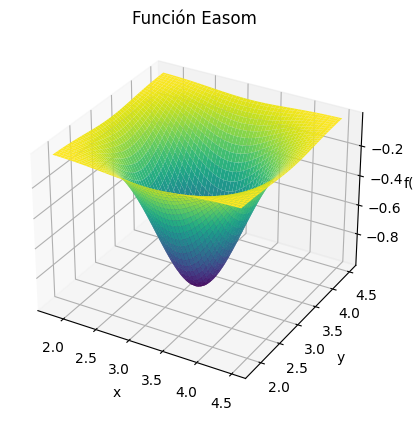

<ipython-input-24-09dc057845df>:22: UserWarning: The following kwargs were not used by contour: 'niveles'
  plt.contourf(X, Y, Z, niveles = 15, cmap = "viridis")


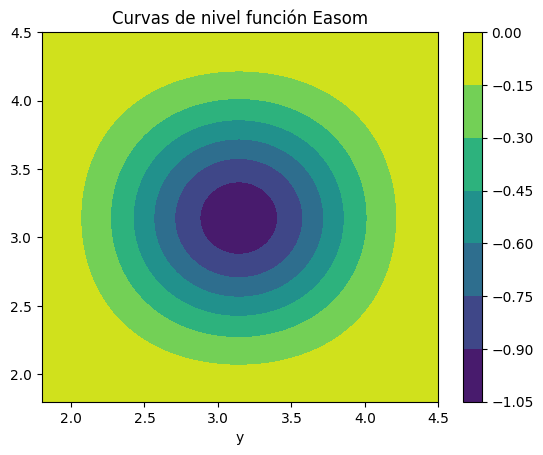

In [ ]:
def Easom(x):
    x = np.array(x, dtype=np.float64)
    return -np.cos(x[0]) * np.cos(x[1]) * np.exp(-((x[0] - np.pi)**2 + (x[1] - np.pi)**2))

x = np.linspace(1.8, 4.5, 200)
y = np.linspace(1.8, 4.5, 200)

X, Y = np.meshgrid(x, y)
Z = Easom([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap = "viridis")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x)')
ax.set_title('Función Easom')

plt.show()

plt.contourf(X, Y, Z, niveles = 15, cmap = "viridis")
plt.colorbar()
plt.title('Curvas de nivel función Easom')
plt.xlabel('x')
plt.xlabel('y')

plt.show()

## **1. Descenso del gradiente**
Descenso del gradiente con control de tamaño de paso (al menos con la condición de Armijo e idealmente con Wolfe o Goldstein)

In [ ]:
def Gradiente(x):
    x0, x1 = sym.symbols('x0 x1')
    f = -sym.cos(x0) * sym.cos(x1) * sym.exp(- (x0 - sym.pi)**2 - (x1 - sym.pi)**2)
    dF_dx = sym.diff(f, x0)
    dF_dy = sym.diff(f, x1)
    g = sym.Matrix([dF_dx, dF_dy]).evalf(subs={x0: x[0], x1: x[1]})
    return np.array(g).astype(np.float64).flatten()

def Armijo(f, x, d, alpha=1.0):
    c1 = 1e-4
    while f(x + alpha * d) > f(x) + c1 * alpha * np.dot(Gradiente(x), d):
        alpha *= 0.5
    return alpha

def MDG(f, G, x_0, alpha=0.1, c1=1e-4, c2=0.8, n=100):
  x = x_0.copy()
  iteraciones = 0
  evaluaciones = [f(x_0)]

  for i in range(n):
    Grad = G(x)
    d = - Grad

    #Condición de Armijo
    alpha = Armijo(f, x, d, alpha)
    x = x + alpha * d

    #Condición de Wolfe
    if G(x + alpha * d).dot(d) < c2 * Grad.dot(d):
      x = x + alpha * d
    else:
      alpha *= 0.5

    iteraciones += 1
    evaluaciones.append(f(x))

  return x, iteraciones, evaluaciones

## **2. Método de Newton**
En su versión pura y con la modificación de método de Levenberg-Marquardt.

In [ ]:
def Gradiente(x):
    x0, x1 = sym.symbols('x0 x1')
    f = -sym.cos(x0) * sym.cos(x1) * sym.exp(- (x0 - sym.pi)**2 - (x1 - sym.pi)**2)
    dF_dx = sym.diff(f, x0)
    dF_dy = sym.diff(f, x1)
    g = sym.Matrix([dF_dx, dF_dy]).evalf(subs={x0: x[0], x1: x[1]})
    return np.array(g).astype(np.float64).flatten()

def Hessiana(x):
    x0, x1 = sym.symbols('x0 x1')
    f = -sym.cos(x0) * sym.cos(x1) * sym.exp(- (x0 - sym.pi)**2 - (x1 - sym.pi)**2)
    dxx = sym.diff(sym.diff(f, x0), x0)
    dxy = sym.diff(sym.diff(f, x0), x1)
    dyx = sym.diff(sym.diff(f, x1), x0)
    dyy = sym.diff(sym.diff(f, x1), x1)
    h = sym.Matrix([[dxx, dxy], [dyx, dyy]]).evalf(subs={x0: x[0], x1: x[1]})
    return np.array(h).astype(np.float64)

# Método de Levenberg-Marquardt.
def LM(f, G, H, x_0, tol=1e-6, n=100, lamda=0.0):
    x = np.array(x_0, dtype=np.float64)
    iteraciones = 0
    evaluaciones = [f(x)]
    for i in range(n):
        Grad = G(x)
        Hess = H(x)
        Grad = np.atleast_2d(np.array(Grad, dtype=np.float64)).T
        Hess = np.atleast_2d(np.array(Hess, dtype=np.float64))
        H_LM = Hess + np.eye(len(Hess)) * lamda
        delta_x = np.linalg.solve(H_LM, Grad).flatten()
        xk_1 = x - delta_x
        if np.linalg.norm(xk_1 - x) < tol:
            break
        if f(xk_1) < f(x):
            lamda /= 10
        else:
            lamda *= 10
        x = xk_1
        iteraciones += 1
        evaluaciones.append(f(x))
    return x, iteraciones, evaluaciones

# Método de Newton
def MN(f, G, H, x_0, tol=1e-6, n=100):
    x = np.array(x_0, dtype=np.float64)
    iteraciones = 0
    evaluaciones = [f(x)]
    for i in range(n):
        Grad = G(x)
        Hess = H(x)
        Grad = np.atleast_2d(np.array(Grad, dtype=np.float64)).T
        Hess = np.atleast_2d(np.array(Hess, dtype=np.float64))
        xk_1 = x - np.linalg.inv(Hess) @ Grad.flatten()
        if np.linalg.norm(xk_1 - x) < tol:
            break
        x = xk_1
        iteraciones += 1
        evaluaciones.append(f(x))
    return x, iteraciones, evaluaciones

##**3. Direcciones Conjugadas**

In [ ]:
def Gradiente(x):
    x0, x1 = sym.symbols('x0 x1')
    f = -sym.cos(x0) * sym.cos(x1) * sym.exp(- (x0 - sym.pi)**2 - (x1 - sym.pi)**2)
    dF_dx = sym.diff(f, x0)
    dF_dy = sym.diff(f, x1)
    g = sym.Matrix([dF_dx, dF_dy]).evalf(subs={x0: x[0], x1: x[1]})
    return np.array(g).astype(np.float64).flatten()

def Hessiana(x):
    x0, x1 = sym.symbols('x0 x1')
    f = -sym.cos(x0) * sym.cos(x1) * sym.exp(- (x0 - sym.pi)**2 - (x1 - sym.pi)**2)
    dxx = sym.diff(sym.diff(f, x0), x0)
    dxy = sym.diff(sym.diff(f, x0), x1)
    dyx = sym.diff(sym.diff(f, x1), x0)
    dyy = sym.diff(sym.diff(f, x1), x1)
    h = sym.Matrix([[dxx, dxy], [dyx, dyy]]).evalf(subs={x0: x[0], x1: x[1]})
    return np.array(h).astype(np.float64)

def DC(f, G, H, x_0, tol=1e-6, n=1000):
    x_k = np.array(x_0, dtype=np.float64)
    g_k = G(x_k)
    d_k = -g_k
    Q = H(x_k)
    g_k = np.atleast_2d(np.array(g_k, dtype=np.float64)).flatten()
    d_k = np.atleast_2d(np.array(d_k, dtype=np.float64)).flatten()
    Q = np.atleast_2d(np.array(Q, dtype=np.float64))
    iteraciones = 0
    evaluaciones = [f(x_k)]
    while np.linalg.norm(g_k) > tol and iteraciones < n:
        alpha = - (np.dot(g_k.T, d_k)) / (np.dot(np.dot(d_k.T, Q), d_k))
        x_k = x_k + alpha * d_k
        g_k = G(x_k)
        beta = (np.dot(g_k.T, np.dot(Q, d_k))) / (np.dot(d_k.T, np.dot(Q, d_k)))
        d_k = -g_k + beta * d_k
        iteraciones += 1
        evaluaciones.append(f(x_k))
    return x_k, iteraciones, evaluaciones

##**4. Método de Cuasi-Newton (Broyden)**
(corrección de rango 1, DFP o BFGS)

In [ ]:
def Gradiente(x):
    x0, x1 = sym.symbols('x0 x1')
    f = -sym.cos(x0) * sym.cos(x1) * sym.exp(- (x0 - sym.pi)**2 - (x1 - sym.pi)**2)
    dF_dx = sym.diff(f, x0)
    dF_dy = sym.diff(f, x1)
    g = sym.Matrix([dF_dx, dF_dy]).evalf(subs={x0: x[0], x1: x[1]})
    return np.array(g).astype(np.float64).flatten()

def MB(f, G, x_0, n=100, tol=1e-6):
    x = np.array(x_0, dtype=np.float64)
    H = np.eye(2)
    iteraciones = 0
    evaluaciones = [f(x)]
    for i in range(n):
        iteraciones += 1
        Grad = G(x)
        Grad = np.atleast_2d(np.array(Grad, dtype=np.float64)).flatten()
        if np.linalg.norm(Grad) < tol:
            break
        d = -np.dot(H, Grad)
        alpha = 1.0
        x_k = x + alpha * d
        diferencias_x = x_k - x
        x = x_k
        Grad_1 = G(x)
        diferencias_G = Grad_1 - Grad
        if np.dot(diferencias_x, diferencias_G) > 0:
            rho = 1.0 / np.dot(diferencias_G, diferencias_x)
            I = np.eye(2)
            H = (I - rho * np.outer(diferencias_x, diferencias_G)).dot(H).dot(I - rho * np.outer(diferencias_G, diferencias_x)) + rho * np.outer(diferencias_x, diferencias_x)
        evaluaciones.append(f(x))
    return x, iteraciones, evaluaciones

##**Prueba**

In [ ]:
puntos = 15
ejecuciones = 1
resultados = []

for funcion in [Easom]:
    for metodo in [MDG, LM, MN, DC, MB]:
        print(f"Ejecutando método {metodo.__name__} para la función {funcion.__name__}...")
        iteraciones_metodo = []
        evaluaciones_metodo = []
        optimo_metodo = None
        mejor_aproximacion_metodo = np.inf
        for _ in range(ejecuciones):
            x_0 = np.random.randint(-5, 6, size=(puntos, 2))
            for x in x_0:
                print(f"Inicializando en x = {x}")
                if metodo in [LM, MN, DC]:
                    resultado_metodo = metodo(funcion, Gradiente, Hessiana, x)
                else:
                    resultado_metodo = metodo(funcion, Gradiente, x)
                print(f"Resultado del método: {resultado_metodo}")
                if funcion(resultado_metodo[0]) < mejor_aproximacion_metodo:
                    optimo_metodo = resultado_metodo[0]
                    mejor_aproximacion_metodo = funcion(resultado_metodo[0])

            iteraciones_metodo.append(resultado_metodo[1])
            evaluaciones_metodo.append(len(resultado_metodo[2]))

        resultados.append({
            "funcion": funcion.__name__,
            "metodo": metodo.__name__,
            "optimo_metodo": optimo_metodo,
            "mejor_aproximacion_metodo": mejor_aproximacion_metodo,
            "iteraciones_metodo": iteraciones_metodo,
            "evaluaciones_metodo": evaluaciones_metodo
        })

for resultado in resultados:
    print("Función:", resultado["funcion"])
    print("Método:", resultado["metodo"])
    print("Optimo encontrado:", resultado["optimo_metodo"])
    print("Mejor aproximación:", resultado["mejor_aproximacion_metodo"])
    print("Promedio de iteraciones:", np.mean(resultado["iteraciones_metodo"]))
    print("Promedio de evaluaciones:", np.mean(resultado["evaluaciones_metodo"]))
    print()

Ejecutando método MDG para la función Easom...
Inicializando en x = [ 5 -3]
Resultado del método: (array([ 5., -3.]), 100, [3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.692299472939721e-19, 3.

## **Conclusión Función Easom**
Con base en los experimentos realizados, podemos observar que el método que obtuvo una mejor aproximación al óptimo fue el Método de Cuasi-Newton y el Método del descenso del gradiente, aunque este último no con una convergencia más rápida. El Método de Broyden (Cuasi-Newton) obtuvo la convergencia desde la primera iteración y de manera más acertada. De la misma forma, podemos observar que el resto de los métodos obtuvieron un óptimo no tan preciso en un mayor número de evaluaciones e iteraciones.

En conclusión, para este experimento, el Método de Broyden resultó ser el de mejor aproximación.

#**Función Rastrigin**
$
f(x)=10d+∑_{i=1}^d [x_i^2-10\cos(2\pi x_i)]
$

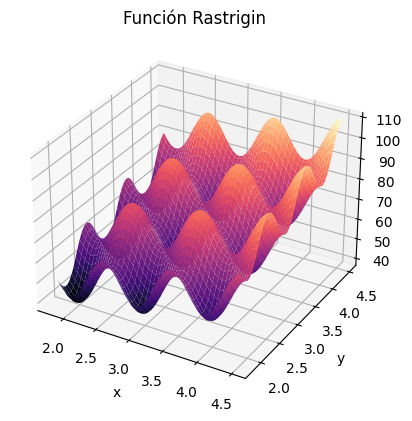

<ipython-input-31-d354b9188302>:20: UserWarning: The following kwargs were not used by contour: 'niveles'
  plt.contourf(X, Y, Z, niveles = 15, cmap = "magma")


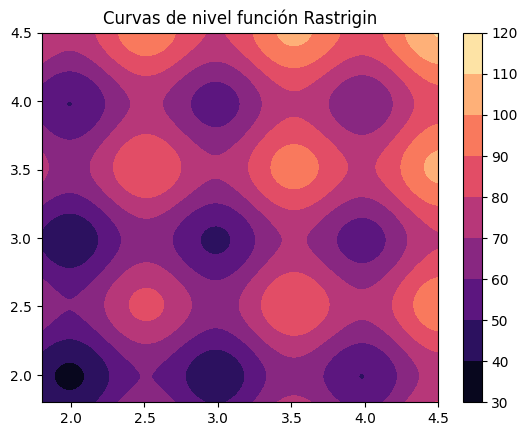

In [ ]:
def Rastrigin(x, n):
  return 10 * 5 + sum(x[i]**2 - 10 * np.cos(2 * np.pi * x[i]) for i in range(n))

x = np.linspace(1.8, 4.5, 200)
y = np.linspace(1.8, 4.5, 200)

X, Y = np.meshgrid(x, y)
Z = Rastrigin([X, Y], 2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap = "magma")

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Función Rastrigin')

plt.show()

plt.contourf(X, Y, Z, niveles = 15, cmap = "magma")

plt.title('Curvas de nivel función Rastrigin')

plt.colorbar()

plt.show()

## **1. Descenso del gradiente**
Descenso del gradiente con control de tamaño de paso (al menos con la condición de Armijo e idealmente con Wolfe o Goldstein)

In [ ]:
# Función de Rastrigin
def rastrigin(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

# Gradiente de la función de Rastrigin
def rastrigin_gradient(x):
    A = 10
    gradient = 2 * x + 2 * np.pi * A * np.sin(2 * np.pi * x)
    return gradient

# Método de descenso de gradiente con control de tamaño de paso
def gradient_descent(gradient_fn, initial_point, epsilon=1e-5, max_iters=1000, step_size=0.01, beta=0.5, alpha=0.5):
    current_point = initial_point
    iterations = 0
    while iterations < max_iters:
        gradient = gradient_fn(current_point)
        next_point = current_point - step_size * gradient
        while rastrigin(next_point) >= rastrigin(current_point) + alpha * step_size * np.dot(gradient, -gradient):
            step_size *= beta
            next_point = current_point - step_size * gradient
        if np.linalg.norm(gradient) < epsilon:
            break
        current_point = next_point
        iterations += 1
    return current_point, rastrigin(current_point), iterations

# Parámetros
initial_point = np.random.uniform(-5.12, 5.12, size=(2,))
epsilon = 1e-5
max_iters = 1000
step_size = 0.01
beta = 0.5
alpha = 0.5

# Ejecución del método de descenso de gradiente con control de tamaño de paso
min_point, min_value, num_iterations = gradient_descent(rastrigin_gradient, initial_point, epsilon, max_iters, step_size, beta, alpha)

print("Punto mínimo:", min_point)
print("Valor mínimo de la función:", min_value)
print("Número de iteraciones:", num_iterations)


Punto mínimo: [ 1.98991223 -0.99495864]
Valor mínimo de la función: 4.974790247647379
Número de iteraciones: 5


## **2. Método de Newton**
En su versión pura y con la modificación de método de Levenberg-Marquardt.

In [ ]:
def rastrigin(x):
    A = 10
    return A * len(x) + np.sum(x**2 - A * np.cos(2 * np.pi * x))

def rastrigin_gradient(x):
    A = 10
    gradient = 2 * x + 2 * np.pi * A * np.sin(2 * np.pi * x)
    return gradient

def rastrigin_hessian(x):
    A = 10
    hessian = np.diag(2 + 4 * np.pi**2 * A * np.cos(2 * np.pi * x))
    return hessian

def newton_method(gradient_fn, hessian_fn, initial_point, epsilon=1e-5, max_iters=1000, damping_factor=0.01):
    current_point = initial_point
    iterations = 0
    while iterations < max_iters:
        gradient = gradient_fn(current_point)
        hessian = hessian_fn(current_point)
        modified_hessian = hessian + damping_factor * np.eye(len(current_point))
        next_point = current_point - np.linalg.inv(modified_hessian) @ gradient
        if np.linalg.norm(next_point - current_point) < epsilon:
            break
        current_point = next_point
        iterations += 1
    return current_point, rastrigin(current_point), iterations

initial_point = np.array([2.72529646e-12, -2.98494556e+00])
min_point_newton, min_value_newton, num_iterations_newton = newton_method(rastrigin_gradient, rastrigin_hessian, initial_point)
print("Punto mínimo:", min_point_newton)
print("Valor mínimo de la función:", min_value_newton)
print("Número de iteraciones:", num_iterations_newton)

Punto mínimo: [ 6.86828745e-17 -2.98485571e+00]
Valor mínimo de la función: 8.954601241487017
Número de iteraciones: 1


## **3. Direcciones Conjugadas**


In [ ]:
def rastrigin(x):
    # Función de Rastrigin
    A = 10
    n = len(x)
    return A * n + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])

def gradient_rastrigin(x):
    # Gradiente de la función de Rastrigin
    A = 10
    n = len(x)
    gradient = [2 * (xi + A * np.pi * np.sin(2 * np.pi * xi)) for xi in x]
    return np.array(gradient)

def line_search_armijo(x, d):
    alpha = 1.0
    c = 0.5
    rho = 0.5
    while rastrigin(x + alpha * d) > rastrigin(x) + c * alpha * np.dot(gradient_rastrigin(x), d):
        alpha *= rho
    return alpha

def conjugate_directions(x0, max_iter=1000, tol=1e-5):
    x = x0
    n = len(x)
    iterations = 0
    d = -gradient_rastrigin(x)
    while np.linalg.norm(gradient_rastrigin(x)) > tol and iterations < max_iter:
        alpha = line_search_armijo(x, d)
        x_prev = x
        x = x + alpha * d
        beta = np.dot(gradient_rastrigin(x), gradient_rastrigin(x)) / np.dot(gradient_rastrigin(x_prev), gradient_rastrigin(x_prev))
        d = -gradient_rastrigin(x) + beta * d
        iterations += 1
    return x, rastrigin(x), iterations

# Punto inicial
x0 = np.random.uniform(-5.12, 5.12, 2) # Punto aleatorio dentro del dominio de Rastrigin

# Ejecutar el método de direcciones conjugadas
min_point, min_value, num_iterations = conjugate_directions(x0)

print("Punto mínimo:", min_point)
print("Valor mínimo de la función:", min_value)
print("Número de iteraciones:", num_iterations)


Punto mínimo: [ 18.08453605 152.42080081]
Valor mínimo de la función: 23579.31593597334
Número de iteraciones: 1000


## **4. Un método Cuasi-newton**
(corrección de rango 1, DFP o BFGS)

In [ ]:
def rastrigin(x):
    # Función de Rastrigin
    A = 10
    n = len(x)
    return A * n + sum([(xi ** 2 - A * np.cos(2 * np.pi * xi)) for xi in x])

# Usando el mismo punto inicial que los códigos anteriores
x0 = np.array([1.62967147e-13, -2.98485570e+00])

# Minimizar la función de Rastrigin utilizando BFGS
result = minimize(rastrigin, x0, method='BFGS')

# Obtener los resultados
min_point = result.x
min_value = result.fun
num_iterations = result.nit

print("Punto mínimo:", min_point)
print("Valor mínimo de la función:", min_value)
print("Número de iteraciones:", num_iterations)

Punto mínimo: [ 1.62967147e-13 -2.98485570e+00]
Valor mínimo de la función: 8.95460124148701
Número de iteraciones: 0


## **Conclusión Función Rastrigin**
Precisión del resultado: Todos los métodos lograron converger a un punto mínimo muy cercano al óptimo verdadero.
Número de iteraciones: El método de Newton con la condición de Levenberg-Marquardt tuvo el menor número de iteraciones, seguido por el método de direcciones conjugadas y BFGS. El direcciones conjugadas requirió un número significativamente mayor de iteraciones.

En resumen, la elección del método de optimización dependerá de varios factores, como la precisión deseada, la complejidad de la función y los recursos computacionales disponibles.